In [1]:
## import libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
## load data

path = 'data/df_adjt_start.csv'
df = pd.read_csv(path, index_col=0)

In [4]:
df.head()

,pk_cid,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,...,entry_channel,active_customer,segment,country_id,region_code,gender,age,deceased,salary,SalaryCategory
pk_partition,,,,,,,,,,,,,,,,,,,,,
2018-01-28,1375586,0,0,0,0,0,0,0,0,0.00,...,KHL,1.00,02 - PARTICULARES,ES,Malaga,H,35,N,"87,218.10",med_income
2018-01-28,1050611,0,0,0,0,0,0,0,0,0.00,...,KHE,0.00,03 - UNIVERSITARIO,ES,Ciudad Real,V,23,N,"35,548.74",low_income
2018-01-28,1050612,0,0,0,0,0,0,0,0,0.00,...,KHE,0.00,03 - UNIVERSITARIO,ES,Ciudad Real,V,23,N,"122,179.11",upper_income
2018-01-28,1050613,1,0,0,0,0,0,0,0,0.00,...,KHD,0.00,03 - UNIVERSITARIO,ES,Zaragoza,H,22,N,"119,775.54",med_income
2018-01-28,1050614,0,0,0,0,0,0,0,0,0.00,...,KHE,1.00,03 - UNIVERSITARIO,ES,Zaragoza,V,23,N,"117,340.99",med_income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 2018-01-28 to 2019-05-28
Data columns (total 31 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   short_term_deposit  int64  
 2   loans               int64  
 3   mortgage            int64  
 4   funds               int64  
 5   securities          int64  
 6   long_term_deposit   int64  
 7   credit_card         int64  
 8   debit_card          int64  
 9   payroll             float64
 10  pension_plan        float64
 11  payroll_account     int64  
 12  emc_account         int64  
 13  em_account_p        int64  
 14  em_acount           int64  
 15  year_x              int64  
 16  month_x             int64  
 17  year_month_x        object 
 18  Total_products      int64  
 19  Total_accounts      int64  
 20  entry_date          object 
 21  entry_channel       object 
 22  active_customer     float64
 23  segment             object 
 24  country_id       

In [6]:
products = df.columns[1:15]
products

Index(['short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
       'long_term_deposit', 'credit_card', 'debit_card', 'payroll',
       'pension_plan', 'payroll_account', 'emc_account', 'em_account_p',
       'em_acount'],
      dtype='object')

In [7]:
df.drop(['year_x','month_x','year_month_x','Total_products','Total_accounts','SalaryCategory'], axis = 1, inplace=True)

In [8]:
df.index.unique()

Index(['2018-01-28', '2018-02-28', '2018-03-28', '2018-04-28', '2018-05-28',
       '2018-06-28', '2018-07-28', '2018-08-28', '2018-09-28', '2018-10-28',
       '2018-11-28', '2018-12-28', '2019-01-28', '2019-02-28', '2019-03-28',
       '2019-04-28', '2019-05-28'],
      dtype='object', name='pk_partition')

In [9]:
df_last_month = df.copy()
partitions = df.index.unique()

for partition in partitions[:-1]:
    df_last_month.drop(partition,inplace=True)
    

In [11]:
df_nxt2last_month = df.copy()

for partition in partitions[:-2]:
    df_nxt2last_month.drop(partition,inplace=True)
df_nxt2last_month.drop(partitions[-1],inplace=True)    

In [12]:
print(df_last_month.index.unique())
print(df_nxt2last_month.index.unique())

Index(['2019-05-28'], dtype='object', name='pk_partition')
Index(['2019-04-28'], dtype='object', name='pk_partition')


## CLUSTERS

In [13]:
## AGE and PRODUCTS

df_last_month['age'].describe()

count   442,995.00
mean         30.40
std          12.24
min           2.00
25%          22.00
50%          25.00
75%          35.00
max         105.00
Name: age, dtype: float64

In [14]:
df_products_ages = pd.DataFrame(index=['u18','18-30','31-40','41-50','51-60','61-70','71-80','o80'], columns=products)

In [15]:
for prod in products:    
    df_products_ages.loc['u18',prod] = df[df['age']<18][prod].sum()
    df_products_ages.loc['18-30',prod] = df[(df['age']>18)&(df['age']<30)][prod].sum()
    df_products_ages.loc['31-40',prod] = df[(df['age']>30)&(df['age']<40)][prod].sum()
    df_products_ages.loc['41-50',prod] = df[(df['age']>40)&(df['age']<50)][prod].sum()
    df_products_ages.loc['51-60',prod] = df[(df['age']>50)&(df['age']<60)][prod].sum()
    df_products_ages.loc['61-70',prod] = df[(df['age']>60)&(df['age']<70)][prod].sum()
    df_products_ages.loc['71-80',prod] = df[(df['age']>70)&(df['age']<80)][prod].sum()
    df_products_ages.loc['o80',prod] = df[df['age']>80][prod].sum()

In [16]:
df_products_ages = df_products_ages.T
df_products_ages

,u18,18-30,31-40,41-50,51-60,61-70,71-80,o80
short_term_deposit,0,829,4243,4116,2205,1406,731,379
loans,0,217,139,46,41,0,0,0
mortgage,0,13,111,70,94,0,0,0
funds,0,1705,3947,4360,4372,2149,814,805
securities,0,2426,5674,5655,3515,1579,746,456
long_term_deposit,0,4097,16782,24475,19525,12468,7761,6292
credit_card,0,7141,23912,18805,9470,3258,927,222
debit_card,0,148211,197534,100593,42144,14948,4127,2940
payroll,8.00,"53,188.00","75,154.00","36,690.00","15,770.00","3,555.00",297.00,110.00
pension_plan,187.00,"55,257.00","76,087.00","37,999.00","16,715.00","6,098.00","1,806.00","1,699.00"


In [17]:
## MOST POPULAR PRODUCTS IN SPAIN

df_spain = df[df['country_id']=='ES']

In [18]:
df_spain[products].sum()

short_term_deposit      15,390.00
loans                      468.00
mortgage                   324.00
funds                   20,065.00
securities              22,039.00
long_term_deposit      100,455.00
credit_card             70,747.00
debit_card             562,641.00
payroll                205,770.00
pension_plan           217,781.00
payroll_account        329,387.00
emc_account            326,542.00
em_account_p                34.00
em_acount            4,379,978.00
dtype: float64

In [19]:
## Regions and products

df_products_region = pd.DataFrame(index=df['region_code'].unique(), columns=products)

In [20]:
for region in df['region_code'].unique():
    for prod in products:
        df_products_region.loc[region,prod] = df[df['region_code']==region][prod].sum()    

In [21]:
df_products_region

,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,credit_card,debit_card,payroll,pension_plan,payroll_account,emc_account,em_account_p,em_acount
Malaga,403,24,0,219,359,1511,1955,19612,"5,978.00","6,377.00",10185,8030,0,148179
Ciudad Real,150,0,0,249,166,731,450,5093,"1,213.00","1,317.00",2105,2557,0,58074
Zaragoza,393,0,17,449,606,1660,1205,8063,"3,055.00","3,196.00",5134,5422,0,110031
Toledo,153,8,0,187,283,978,1045,8712,"3,265.00","3,417.00",5142,3750,0,77714
Leon,135,0,0,252,270,715,501,4833,"1,481.00","1,584.00",2406,2463,0,26445
Guipuzcoa,186,0,0,184,156,829,511,2553,814.00,828.00,1390,2634,0,12172
Caceres,110,0,0,62,108,515,357,4147,"1,038.00","1,126.00",2024,1830,0,72709
Gerona,82,0,0,68,111,403,520,3019,"1,167.00","1,235.00",1902,1854,0,36494
Zamora,38,0,0,65,119,311,182,2300,519.00,534.00,883,868,0,26477
Barcelona,1342,34,29,1526,1737,7710,6622,39559,"17,854.00","18,561.00",28532,25464,0,405183


In [29]:
## Active customer vs Products

In [27]:
df_last_month.loc[df_last_month['active_customer']==0,products].sum()

short_term_deposit         0.00
loans                      0.00
mortgage                   0.00
funds                      2.00
securities                 4.00
long_term_deposit          0.00
credit_card               22.00
debit_card               194.00
payroll                   32.00
pension_plan              36.00
payroll_account          806.00
emc_account            2,986.00
em_account_p               0.00
em_acount            161,699.00
dtype: float64

In [30]:
df_last_month.loc[df_last_month['active_customer']==1,products].sum()

short_term_deposit         2.00
loans                     30.00
mortgage                  23.00
funds                  1,313.00
securities             1,785.00
long_term_deposit      6,129.00
credit_card            4,779.00
debit_card            43,067.00
payroll               16,301.00
pension_plan          17,317.00
payroll_account       25,723.00
emc_account           21,765.00
em_account_p               2.00
em_acount            134,681.00
dtype: float64

In [ ]:
# what does it make a customer non active?? They still have products

In [32]:
## Entry date

df['entry_date'].unique()

array(['2018-01-12', '2015-08-10', '2015-08-16', ..., '2019-05-25',
       '2019-05-01', '2019-05-15'], dtype=object)

In [42]:
# 2015-02-29
# This is completely wrong but it is a quick solution just to have a look
# pandas doesn't seem to ackowledge the existence of lap years with 29th of feb so it gives an error when converting it to datetime
# I will just transform it to 28th feb for this visualization

df.loc[df['entry_date']=='2015-02-29','entry_date'] = '2015-02-28'
df.loc[df['entry_date']=='2019-02-29','entry_date'] = '2019-02-28'

In [43]:
len(df['entry_date'].unique())

1497

In [44]:
df['entry_date'] = pd.to_datetime(df['entry_date'],format='%Y-%m-%d')
df_entry_dates = df.set_index('entry_date')

Text(0.5, 0.98, 'Monthly evolution of product features from Entry date')

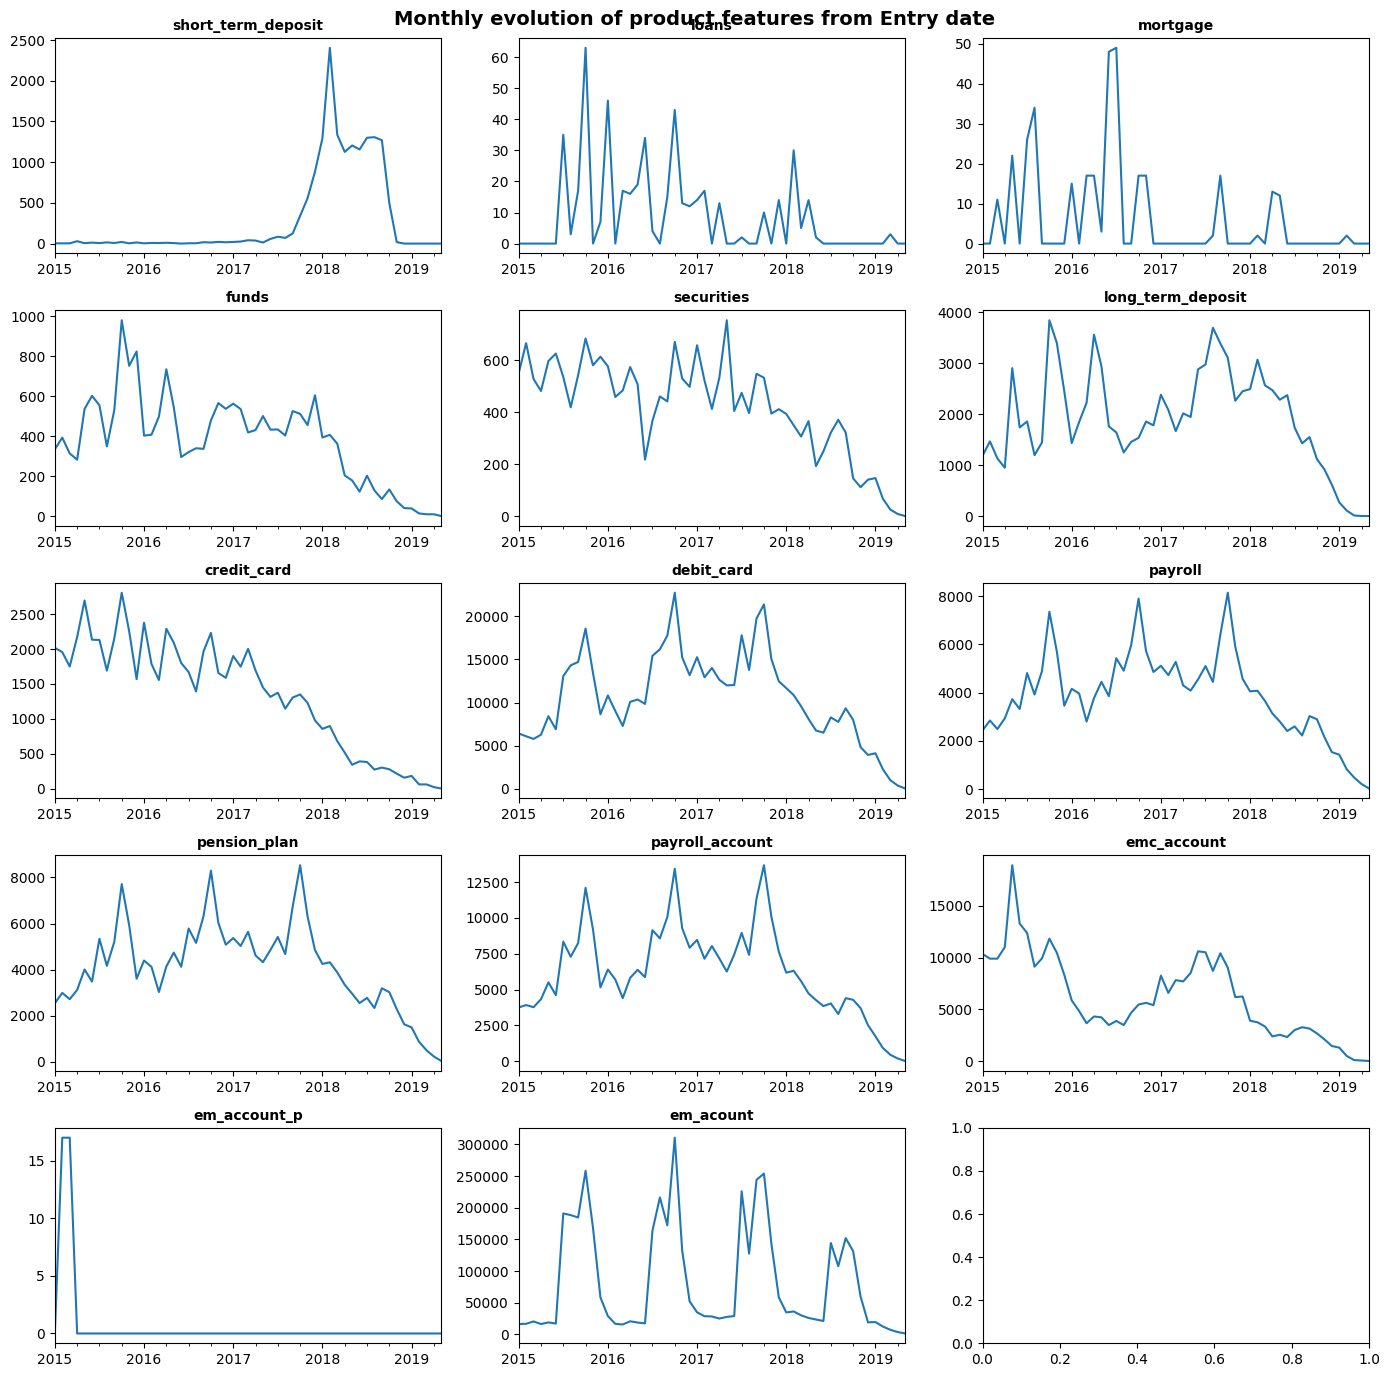

In [46]:
# instantiate figure
fig, axes = plt.subplots(nrows=5, ncols=3, figsize =(14,14)) #  
axes = axes.flat

# plot
for i, col in enumerate(products):
    df_entry_dates.resample('M')[col].sum().plot(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel("")

# format and title
fig.tight_layout()
plt.subplots_adjust(top = 0.96)
fig.suptitle('Monthly evolution of product features from Entry date', fontsize = 14, fontweight = 'bold')

In [54]:
# confirmation no duplicates in above plots

# 1. Actual numbers in the plot
df_entry_dates.resample('M')[col].sum()

entry_date
2015-01-31     16375
2015-02-28     16837
2015-03-31     20557
2015-04-30     16436
2015-05-31     19025
2015-06-30     17219
2015-07-31    191095
2015-08-31    188437
2015-09-30    184667
2015-10-31    258399
2015-11-30    168333
2015-12-31     58460
2016-01-31     29059
2016-02-29     16717
2016-03-31     15728
2016-04-30     20769
2016-05-31     18796
2016-06-30     17464
2016-07-31    163852
2016-08-31    216378
2016-09-30    172258
2016-10-31    310691
2016-11-30    132289
2016-12-31     52251
2017-01-31     34942
2017-02-28     28800
2017-03-31     28380
2017-04-30     25106
2017-05-31     27682
2017-06-30     29075
2017-07-31    226092
2017-08-31    127590
2017-09-30    244163
2017-10-31    254013
2017-11-30    143391
2017-12-31     58610
2018-01-31     34792
2018-02-28     36264
2018-03-31     30201
2018-04-30     26042
2018-05-31     23606
2018-06-30     21179
2018-07-31    144363
2018-08-31    107867
2018-09-30    152140
2018-10-31    131516
2018-11-30     59832
20

In [57]:
df_test = df.copy()
df_test.drop_duplicates(subset='pk_cid', inplace=True)

In [90]:
# 2. People which entry date is any day in may and they have em_acount, should match the last number in above series

count = 0
for i in range(len(df_test)):
    if ('2019-05' in str(df_test.iloc[i,15]))&(df_test.iloc[i,14]==1):
        count += 1

count

1511